**importing the libraries**

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import  RandomOverSampler
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('words')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**Reading the Raw Data from the csv file**

In [3]:
raw_data = pd.read_csv('./AppReviews-FourClasses.csv')
display(raw_data.head())

,Review,label
0,"Besides the occasional crash, this is an amazi...",Bug
1,This could be a great app if it was predictabl...,Bug
2,I can't open since the last 2 updates Pop-ups ...,Bug
3,Use to love this app but it's not working afte...,Bug
4,"Urrrrm\tAfter my third re installing, it final...",Bug


**Raw data set distribution:**

In [4]:
x_data_raw = raw_data['Review']
y_data_raw = raw_data['label']
#Compute the number of examples of each label
label_name, label_counts = np.unique(y_data_raw, return_counts=True)
print("Raw data set distribution:")
print(dict(zip(label_name, label_counts)))

Raw data set distribution:
{'Bug': 370, 'Feature': 295, 'Rating': 2461, 'UserExperience': 607}


**Convert every letter to lower case**

In [5]:
x_data_raw = x_data_raw.str.lower()

In [6]:
x_data_raw.head(5)

0    besides the occasional crash, this is an amazi...
1    this could be a great app if it was predictabl...
2    i can't open since the last 2 updates pop-ups ...
3    use to love this app but it's not working afte...
4    urrrrm\tafter my third re installing, it final...
Name: Review, dtype: object

**Remove the punctuations in the reviews**

In [7]:
def remove_punct(text):
  for i in range(len(text)):
    text = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
  return text
  
x_data_raw= x_data_raw.apply(remove_punct)

In [8]:
x_data_raw.head(5)

0    besides the occasional crash this is an amazin...
1    this could be a great app if it was predictabl...
2    i cant open since the last  updates popups go ...
3    use to love this app but its not working after...
4    urrrrm\tafter my third re installing it finall...
Name: Review, dtype: object

**Remove the stop words in the reviews**

In [9]:
english_stop_words = stopwords.words('english')
x_data_raw= x_data_raw.apply(lambda x: ' '.join([word for word in x.split() if word not in (english_stop_words)]))

In [10]:
x_data_raw.head(5)

0    besides occasional crash amazing product tons ...
1    could great app predictable full bugs unpredic...
2    cant open since last updates popups go crazy i...
3    use love app working new update pages wont scr...
4    urrrrm third installing finally scenery hand b...
Name: Review, dtype: object

**split into train 70%-   val 15%-  test 15%**

In [11]:
# split into train 70%-val 15%-test 15% 
x_train, x_test, y_train, y_test = train_test_split(x_data_raw, y_data_raw, train_size=0.85, random_state=324534, stratify=y_data_raw)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.8237, random_state=324534, stratify=y_train)

**Vectorize the data **

In [12]:

Vectorizerr = TfidfVectorizer(stop_words=None, max_features=100000)

x_train = Vectorizerr.fit_transform(x_train)
x_val = Vectorizerr.transform(x_val)
x_test = Vectorizerr.transform(x_test)

**Oversampling to balance the Training data**

In [13]:
ros = RandomOverSampler(random_state=777)
x_train, y_train = ros.fit_resample(x_train, y_train)

label_name, label_counts = np.unique(y_train, return_counts=True)
print("Train data set distribution:")
print(dict(zip(label_name, label_counts)))


pd.DataFrame(x_train.todense(), columns=Vectorizerr.get_feature_names())

Train data set distribution:
{'Bug': 1723, 'Feature': 1723, 'Rating': 1723, 'UserExperience': 1723}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aakaash,aap,aaps,abandoned,abdolutely,abilities,ability,able,abomination,abreast,abroad,absence,absolute,absolutely,abstract,abu,abysmal,accepted,access,accessed,accessibility,accessible,accessing,accesss,accidentally,accomplish,account,accounts,accurate,accurately,ace,achievement,acknowledge,acls,acquire,acro,across,acrossloved,act,actions,...,xml,xolo,xoxo,xperia,xx,ya,yaaay,yaar,yardage,yards,yay,yea,yeah,year,years,yeh,yehh,yellow,yelp,yes,yesterday,yet,yha,yhu,yo,yojimbo,youll,youre,youtube,youve,yr,yuo,zakas,zen,zero,zip,zone,zoom,zte,zzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6888,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6890,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
print("Training dataset dimensions: ", np.shape(x_train))
print("Number of training labels: ", len(y_train))
print("Testing dataset dimensions: ", np.shape(x_val))
print("Number of testing labels: ", len(y_val))
print("Testing dataset dimensions: ", np.shape(x_test))
print("Number of testing labels: ", len(y_test))

Training dataset dimensions:  (6892, 4738)
Number of training labels:  6892
Testing dataset dimensions:  (560, 4738)
Number of testing labels:  560
Testing dataset dimensions:  (560, 4738)
Number of testing labels:  560


**the distribution of examples of each class**

In [15]:
label_name, label_counts = np.unique(y_train, return_counts=True)
print("Train data set distribution:")
print(dict(zip(label_name, label_counts)))

label_name, label_counts = np.unique(y_val, return_counts=True)
print("Val data set distribution:")
print(dict(zip(label_name, label_counts)))

test_digits, test_counts = np.unique(y_test, return_counts=True)
print("Test set distribution:")
print(dict(zip(test_digits, test_counts)))

Train data set distribution:
{'Bug': 1723, 'Feature': 1723, 'Rating': 1723, 'UserExperience': 1723}
Val data set distribution:
{'Bug': 56, 'Feature': 44, 'Rating': 369, 'UserExperience': 91}
Test set distribution:
{'Bug': 56, 'Feature': 44, 'Rating': 369, 'UserExperience': 91}


**Coverting the labels to digits**

In [16]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_val = encoder.transform(y_val)
y_test = encoder.transform(y_test)

**Classifier1: LogisticRegression**

In [17]:
import sklearn
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

solvers = ['newton-cg', 'liblinear']
c_values = [1.0,0.7,0.65]
max_iter = [100,500,750,1000]

best_solvers=None
best_c_values=None
best_max_iter = None
best_acc=0
val_acc=0

for i in range(len(solvers)):
  for m in range(len(c_values)):
    for f in range(len(max_iter)):
      clf = LogisticRegression(random_state=20211008,solver = solvers[i] ,C=c_values[m],max_iter=max_iter[f])
      clf.fit(x_train,y_train)
      train_y_pred= clf.predict(x_train)
      val_y_pred= clf.predict(x_val)
      train_acc = sklearn.metrics.accuracy_score(y_true=y_train, y_pred=train_y_pred)
      val_acc = sklearn.metrics.accuracy_score(y_true=y_val, y_pred=val_y_pred)
      print("Setting tree solvers={}, c_values={},max_iter= {}, train_acc={:.2f}, val_acc={:.2f}".format(solvers[i],c_values[m],max_iter[f],train_acc, val_acc))
      if val_acc > best_acc:
        best_acc = val_acc
        best_solvers=solvers[i]
        best_c_values=c_values[m]
        best_max_iter = max_iter[f]

print("best Setting tree solvers={}, c_values={},max_iter= {}, val_acc={:.2f}".format(best_solvers,best_c_values,best_max_iter, best_acc))

Setting tree solvers=newton-cg, c_values=1.0,max_iter= 100, train_acc=0.93, val_acc=0.64
Setting tree solvers=newton-cg, c_values=1.0,max_iter= 500, train_acc=0.93, val_acc=0.64
Setting tree solvers=newton-cg, c_values=1.0,max_iter= 750, train_acc=0.93, val_acc=0.64
Setting tree solvers=newton-cg, c_values=1.0,max_iter= 1000, train_acc=0.93, val_acc=0.64
Setting tree solvers=newton-cg, c_values=0.7,max_iter= 100, train_acc=0.93, val_acc=0.64
Setting tree solvers=newton-cg, c_values=0.7,max_iter= 500, train_acc=0.93, val_acc=0.64
Setting tree solvers=newton-cg, c_values=0.7,max_iter= 750, train_acc=0.93, val_acc=0.64
Setting tree solvers=newton-cg, c_values=0.7,max_iter= 1000, train_acc=0.93, val_acc=0.64
Setting tree solvers=newton-cg, c_values=0.65,max_iter= 100, train_acc=0.92, val_acc=0.64
Setting tree solvers=newton-cg, c_values=0.65,max_iter= 500, train_acc=0.92, val_acc=0.64
Setting tree solvers=newton-cg, c_values=0.65,max_iter= 750, train_acc=0.92, val_acc=0.64
Setting tree sol

Test Accuracy: 0.6625
Precision: 0.6859572668364511
Recall: 0.6625
F1: 0.6722485147905315


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


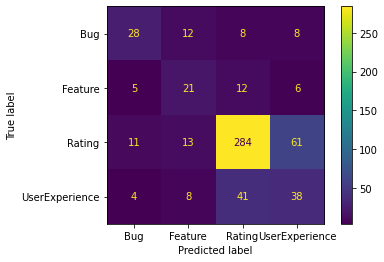

In [18]:
from sklearn.metrics import plot_confusion_matrix

clf = LogisticRegression(random_state=20211008)

clf.fit(x_train,y_train)

test_y_pred= clf.predict(x_test)

# Model Accuracy
print("Test Accuracy:",metrics.accuracy_score(y_test, test_y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, test_y_pred , average="weighted"))
# Model Recall
print("Recall:",metrics.recall_score(y_test, test_y_pred, average="weighted"))
# Model F1
print("F1:",metrics.f1_score(y_test, test_y_pred, average="weighted"))
plot_confusion_matrix(clf, x_test, y_test)  
plt.show()

**Classifier2: SVC**

In [19]:
from sklearn.svm import SVC
kernal=['linear','rbf','sigmoid','poly']
degree=[1,2,3,4]
best_acc=0
val_acc=0
best_kernal=None
best_degree=1
for i in range(len(kernal)):
  if kernal[i]=='poly':
    for d in range(len(degree)):
      clf = SVC(kernel='poly',degree=degree[d],C = 1)
      clf.fit(x_train,y_train)
      train_y_pred =clf.predict(x_train)
      train_acc = sklearn.metrics.accuracy_score(y_true=y_train, y_pred=train_y_pred)
      val_y_pred =clf.predict(x_val)
      val_acc = sklearn.metrics.accuracy_score(y_true=y_val, y_pred=val_y_pred)
      print("Setting kernal={},with degree={}, train_acc={:.2f}, val_acc={:.2f}".format(kernal[i],degree[d], train_acc, val_acc))
      if val_acc > best_acc:
        best_acc = val_acc
        best_kernal = kernal[i]
        best_degree=degree[d]

  else:
    clf = SVC(kernel=kernal[i],C = 1)
    clf.fit(x_train,y_train)
    train_y_pred =clf.predict(x_train)
    train_acc = sklearn.metrics.accuracy_score(y_true=y_train, y_pred=train_y_pred)
    val_y_pred =clf.predict(x_val)
    val_acc = sklearn.metrics.accuracy_score(y_true=y_val, y_pred=val_y_pred)
    print("Setting kernal={}, train_acc={:.2f}, val_acc={:.2f}".format(kernal[i], train_acc, val_acc))
  if val_acc > best_acc:
      best_acc = val_acc
      best_kernal = kernal[i]
if best_kernal=='poly':
  print("Best setting kernal={},with degree={}, val_acc={:.2f}".format(best_kernal,best_degree, best_acc))

else:
  print("Best setting kernal={}, val_acc={:.2f}".format(best_kernal, best_acc))

Setting kernal=linear, train_acc=0.94, val_acc=0.62
Setting kernal=rbf, train_acc=0.96, val_acc=0.64
Setting kernal=sigmoid, train_acc=0.90, val_acc=0.58
Setting kernal=poly,with degree=1, train_acc=0.94, val_acc=0.62
Setting kernal=poly,with degree=2, train_acc=0.96, val_acc=0.62
Setting kernal=poly,with degree=3, train_acc=0.96, val_acc=0.59
Setting kernal=poly,with degree=4, train_acc=0.96, val_acc=0.59
Best setting kernal=rbf, val_acc=0.64


Best setting kernal=rbf, val_acc=0.59
Test Accuracy: 0.6732142857142858
Precision: 0.6441773978539599
Recall: 0.6732142857142858
F1: 0.6489913940420743


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


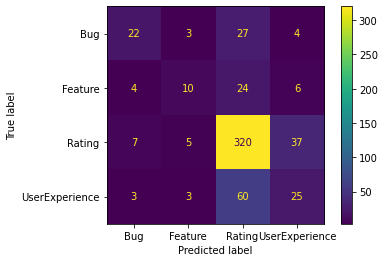

In [28]:
if best_kernal=='poly':
  print("Best setting kernal={},with degree={}, val_acc={:.2f}".format(best_kernal,best_degree, best_acc))

else:
  print("Best setting kernal={}, val_acc={:.2f}".format(best_kernal, best_acc))

clf = SVC(kernel=best_kernal,C= best_degree)

clf.fit(x_train,y_train)

test_y_pred= clf.predict(x_test)

# Model Accuracy
print("Test Accuracy:",metrics.accuracy_score(y_test, test_y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, test_y_pred , average="weighted"))
# Model Recall
print("Recall:",metrics.recall_score(y_test, test_y_pred, average="weighted"))
# Model F1
print("F1:",metrics.f1_score(y_test, test_y_pred, average="weighted"))

plot_confusion_matrix(clf, x_test, y_test)  
plt.show()


**Classifier3: Decision Tree**

In [21]:
from sklearn.tree import DecisionTreeClassifier

tree_criterion=['entropy','gini']
max_depth=[300,400,500]
min_samples_leaf=[1,2]
best_tree_criterion=None
best_acc=0
best_max_depth=0
best_min_sample_leaf=0
val_acc=0
for i in range(len(tree_criterion)):
  for k in range(len(max_depth)):
    for m in range(len(min_samples_leaf)):
      clf = DecisionTreeClassifier(random_state=0,criterion=tree_criterion[i], max_depth=max_depth[k],min_samples_leaf=min_samples_leaf[m])
      clf.fit(x_train,y_train)
      train_y_pred= clf.predict(x_train)
      val_y_pred= clf.predict(x_val)
      train_acc = sklearn.metrics.accuracy_score(y_true=y_train, y_pred=train_y_pred)
      val_acc = sklearn.metrics.accuracy_score(y_true=y_val, y_pred=val_y_pred)
      print("Setting tree criterion={},max depth={},min_samples_leaf={} train_acc={:.2f}, val_acc={:.2f}".format(tree_criterion[i],max_depth[k],min_samples_leaf[m],train_acc, val_acc))
      if val_acc > best_acc:
        best_tree_criterion=tree_criterion[i]
        best_acc = val_acc
        best_max_depth = max_depth[k]
        best_min_sample_leaf=min_samples_leaf[m]

print("best tree criterion={},max depth={},min_samples_leaf={} with val_acc={:.2f}".format(best_tree_criterion,best_max_depth,best_min_sample_leaf, best_acc))


Setting tree criterion=entropy,max depth=300,min_samples_leaf=1 train_acc=0.96, val_acc=0.57
Setting tree criterion=entropy,max depth=300,min_samples_leaf=2 train_acc=0.95, val_acc=0.59
Setting tree criterion=entropy,max depth=400,min_samples_leaf=1 train_acc=0.96, val_acc=0.57
Setting tree criterion=entropy,max depth=400,min_samples_leaf=2 train_acc=0.95, val_acc=0.59
Setting tree criterion=entropy,max depth=500,min_samples_leaf=1 train_acc=0.96, val_acc=0.57
Setting tree criterion=entropy,max depth=500,min_samples_leaf=2 train_acc=0.95, val_acc=0.59
Setting tree criterion=gini,max depth=300,min_samples_leaf=1 train_acc=0.96, val_acc=0.57
Setting tree criterion=gini,max depth=300,min_samples_leaf=2 train_acc=0.95, val_acc=0.59
Setting tree criterion=gini,max depth=400,min_samples_leaf=1 train_acc=0.96, val_acc=0.57
Setting tree criterion=gini,max depth=400,min_samples_leaf=2 train_acc=0.95, val_acc=0.59
Setting tree criterion=gini,max depth=500,min_samples_leaf=1 train_acc=0.96, val_a

with tree criterion=entropy, max depth=300, min_samples_leaf=2
Test Accuracy: 0.5982142857142857
Precision: 0.5828580870147102
Recall: 0.5982142857142857
F1: 0.5891684441095986


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


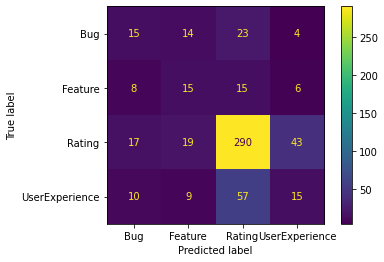

In [22]:
clf = DecisionTreeClassifier(random_state=0,criterion=best_tree_criterion, max_depth=best_max_depth,min_samples_leaf=best_min_sample_leaf)
clf.fit(x_train,y_train)
test_y_pred= clf.predict(x_test)
print("with tree criterion={}, max depth={}, min_samples_leaf={}".format(best_tree_criterion,best_max_depth,best_min_sample_leaf))

# Model Accuracy
print("Test Accuracy:",metrics.accuracy_score(y_test, test_y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, test_y_pred , average="weighted"))
# Model Recall
print("Recall:",metrics.recall_score(y_test, test_y_pred, average="weighted"))
# Model F1
print("F1:",metrics.f1_score(y_test, test_y_pred, average="weighted"))
plot_confusion_matrix(clf, x_test, y_test)  
plt.show()

**Classifier4: Bagging**

In [23]:
from sklearn.ensemble import BaggingClassifier
# training and hyper-parameter tuning
n_estimators = [100,300,500,600]
max_features = [20,30,35]

best_score=0
val_score=0
best_n_estimators= None
best_max_features =None
for i in range(len(n_estimators)):
  for m in range(len(max_features)):
    clf = BaggingClassifier(
      bootstrap= True,
      n_estimators= n_estimators[i],
      max_features = max_features[m],
      )
    clf.fit(x_train,y_train)
    train_score = clf.score(x_train,y_train)
    val_score = clf.score(x_val,y_val)
    print("Setting n estimators={},max features={} train_acc={:.2f}, val_acc={:.2f}".format(n_estimators[i],max_features[m],train_score, val_score))
    if val_score > best_score:
      best_score = val_score
      best_n_estimators= n_estimators[i]
      best_max_features =max_features[m]

print("best n estimators={}, max features={}, val_score={:.2f}".format(best_n_estimators,best_max_features, best_score))

Setting n estimators=100,max features=20 train_acc=0.88, val_acc=0.59
Setting n estimators=100,max features=30 train_acc=0.93, val_acc=0.57
Setting n estimators=100,max features=35 train_acc=0.92, val_acc=0.59
Setting n estimators=300,max features=20 train_acc=0.93, val_acc=0.61
Setting n estimators=300,max features=30 train_acc=0.94, val_acc=0.62
Setting n estimators=300,max features=35 train_acc=0.94, val_acc=0.60
Setting n estimators=500,max features=20 train_acc=0.94, val_acc=0.62
Setting n estimators=500,max features=30 train_acc=0.94, val_acc=0.62
Setting n estimators=500,max features=35 train_acc=0.94, val_acc=0.62
Setting n estimators=600,max features=20 train_acc=0.93, val_acc=0.62
Setting n estimators=600,max features=30 train_acc=0.94, val_acc=0.62
Setting n estimators=600,max features=35 train_acc=0.94, val_acc=0.62
best n estimators=600, max features=20, val_score=0.62


With n estimators=600,max features=20
Test Accuracy: 0.6232142857142857
Precision: 0.5730298392084106
Recall: 0.6232142857142857
F1: 0.5871737869038195


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


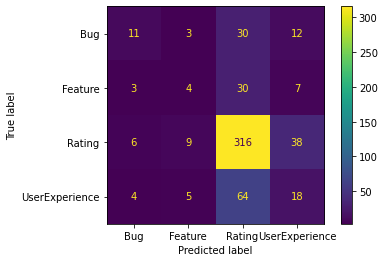

In [24]:
print("With n estimators={},max features={}".format(best_n_estimators,best_max_features))

clf = BaggingClassifier(
  bootstrap= True,
  n_estimators= best_n_estimators,
  max_features = best_max_features,
  )

clf.fit(x_train,y_train)
test_y_pred= clf.predict(x_test)

# Model Accuracy
print("Test Accuracy:",metrics.accuracy_score(y_test, test_y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, test_y_pred , average="weighted"))
# Model Recall
print("Recall:",metrics.recall_score(y_test, test_y_pred, average="weighted"))
# Model F1
print("F1:",metrics.f1_score(y_test, test_y_pred, average="weighted"))
plot_confusion_matrix(clf, x_test, y_test)  
plt.show()

**Classifier5: MLP**

**Convert the labels to one hot encoding**

In [25]:
encoder = LabelBinarizer()
y_train_onehot = encoder.fit_transform(y_train)
y_val_onehot = encoder.fit_transform(y_val)
y_test_onehot = encoder.fit_transform(y_test)

In [26]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1,hidden_layer_sizes=(100), max_iter=100)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Test Accuracy: 0.6321428571428571
Precision: 0.6296697528395456
Recall: 0.6321428571428571
F1: 0.6306098082976459


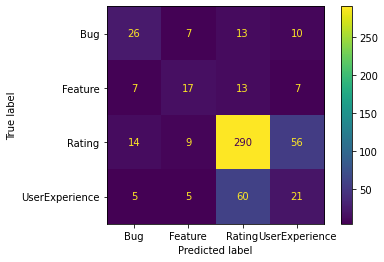

In [27]:
clf.fit(x_train,y_train)
test_y_pred= clf.predict(x_test)

# Model Accuracy
print("Test Accuracy:",metrics.accuracy_score(y_test, test_y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, test_y_pred , average="weighted"))
# Model Recall
print("Recall:",metrics.recall_score(y_test, test_y_pred, average="weighted"))
# Model F1
print("F1:",metrics.f1_score(y_test, test_y_pred, average="weighted"))
plot_confusion_matrix(clf, x_test, y_test)  
plt.show()